<a href="https://colab.research.google.com/github/DrAlexSanz/Notebooks-for-trials-and-problems/blob/master/Manual_CONV_and_POOL_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook I will be implementing a convolution and pooling operation



*   Padding
*   Convolution operation

*   Pooling operation

*   Forward convolution
*   Backward convolution

*   Forward pooling
*   Backward pooling







In [22]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Padding function. This is applied to all the 3 RGB components of the picture. You can see it as a padding in $\mathcal{R}^3$.

In [0]:
def zero_padding(X, pad):
    
    """
    This function pads with 0s. The images are X, passed as a numpy array.
    pad is an integer. It's the amount of padding that I apply to the picture.
    
    X is a vector of dimension (m, Height, Width, n_colours) ----> 4 components!!
    m is the number of examples/photos. n_colours should be 3, RGB, but can be some other number, typically 4 for CMYK. I don't pad this one.
    
    np.pad is the function to pad. There are many arguments but I need to focus on the way to input the data
    
    After X I have to input the before and after dimension for every component. I could pad the left side with 3 and the right side with 45 for example.
    Normally I will pad only these two and with the same number, therefore is a tuple (pad,pad). Could be (3,45) if I need to.
    
    The first component is the number of pictures, don't pad this or the number of colours.
    
    Height and Width are padded.
    
    mode = "constant" is to pad with a constant value. I can also pad with the edge values, the mean, the median, etc.
    constant_values is to set a value with which I pad. Normally it will be 0, but I could set it to something.
    
    Remember X_pad has dimensions (m, Height + 2*pad, Width + 2*pad, n_colours)
    
    """
    
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), mode = "constant", constant_values = 0)
    
    return X_pad

Now I am going to pad a random value vector, just to check the performance of my function.

The shape of X is:  (4, 3, 3, 2)
The shape of X_pad is:  (4, 7, 7, 2)


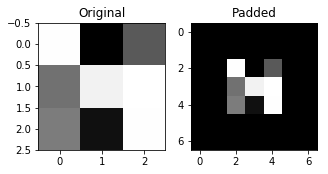

In [24]:
X = np.random.rand(4, 3, 3, 2)

pad = 2

X_pad = zero_padding(X, pad)

print("The shape of X is: ", X.shape)
print("The shape of X_pad is: ", X_pad.shape)

fig, axarr = plt.subplots(1, 2)

axarr[0].set_title("Original")
axarr[1].set_title("Padded")
axarr[0].imshow(X[0, :, :, 0])
axarr[1].imshow(X_pad[0, :, :, 0])


And the picture can be seen in the padded version surrounded by 0s, which are shown in black.

Now I am going to implement a convolution filter. Only one step of the filtering operation. The for loop I will do it later.

In [0]:
def conv_one_step(Sector, W, b):
  
  """
  This function performs 1 convolution step. Takes the current sector of the image, multiplies by the weights (W, unsurprisingly) and adds the bias, then sum all.
  Then, somehow I will move the filter, selecting a new sector and then multiply and add. But this is not done by this function.
  
  PARAMETERS:
  
  Sector is a matrix of dimension (f, f, n_colours)
  
  W is a matrix of dimension (f, f, n_colours)
  b is a matrix of dimension (1, 1, 1), that will get broadcasted in the sum.
  
  conv is a scalar obviously. The result of a convolution is a scalar.
  
  """
  
  sec = np.multiply(Sector, W) + b
  conv = np.sum(sec)
  
  return conv

Now test this. I use randomly generated matrices but they should be the result of selecting the relevant pixels of the current image.

In [26]:
random_mat = np.random.rand(4, 4, 3)

W = np.random.rand(4, 4, 3)

b = np.random.rand(1, 1, 1)

result_conv = conv_one_step(random_mat, W, b)

print("The result of a random convolution is: ", result_conv)

The result of a random convolution is:  39.91450013077366


At this point, this works